In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
from matplotlib import rcParams
import matplotlib.font_manager
rcParams['font.sans-serif']=['Arial']
sc.settings.set_figure_params(dpi=100, facecolor='white',fontsize=12)

scanpy==1.7.2 anndata==0.7.6 umap==0.4.6 numpy==1.22.4 scipy==1.6.2 pandas==1.5.2 scikit-learn==0.22 statsmodels==0.12.2 python-igraph==0.9.4


In [13]:
adata=sc.read('RNA_446267cells_raw.h5ad')
adata

AnnData object with n_obs × n_vars = 446267 × 48341
    obs: 'celltype_used', 'n_genes', 'R1_id', 'R2_id', 'R3_id', 'P1_id', 'B_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'P1_B_id', 'prep_date', 'patient_id', 'renal_region', 'patient_region_id', 'n_counts', 'doublet_score', 'predicted_doublet', 'celltype_used2', 'celltype1', 'celltype2', 'celltype3', 'celltype4', 'patient_region_id_new', 'renal_region_new', 'celltype5', 'celltype6', 'S_score', 'G2M_score', 'phase', 'core_matrisome_score', 'ECMglyco_score', 'colla_score', 'proteo_score', 'matrisome_asso_score', 'ECM_affi_score', 'ECM_regu_score', 'secre_fac_score', 'celltype_2023'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'celltype1_colors', 'celltype2_colors', 'celltype3_colors', 'celltype4_colors', 'celltype5_colors', 'celltype6_colors', 'celltype_2023_colors', 'dendrogram_celltype4', 'hvg', 'leiden', 'neighbors', 'patient_id_colors

In [14]:
adata = adata[:, gene_list]#gene list includes 2111 metabolism genes; the list can be found in Mendeley Data
adata

View of AnnData object with n_obs × n_vars = 446267 × 2111
    obs: 'celltype_used', 'n_genes', 'R1_id', 'R2_id', 'R3_id', 'P1_id', 'B_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'P1_B_id', 'prep_date', 'patient_id', 'renal_region', 'patient_region_id', 'n_counts', 'doublet_score', 'predicted_doublet', 'celltype_used2', 'celltype1', 'celltype2', 'celltype3', 'celltype4', 'patient_region_id_new', 'renal_region_new', 'celltype5', 'celltype6', 'S_score', 'G2M_score', 'phase', 'core_matrisome_score', 'ECMglyco_score', 'colla_score', 'proteo_score', 'matrisome_asso_score', 'ECM_affi_score', 'ECM_regu_score', 'secre_fac_score', 'celltype_2023'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'celltype1_colors', 'celltype4_colors', 'celltype5_colors', 'celltype6_colors', 'celltype_2023_colors', 'dendrogram_celltype4', 'hvg', 'leiden', 'neighbors', 'patient_id_colors', 'patient_region_id_new_colors'

In [15]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

Trying to set attribute `.var` of view, copying.


In [17]:
print(np.mean(adata.obs['n_genes_by_counts']))
print(np.mean(adata.obs['total_counts']))
print(np.mean(adata.obs['total_counts_mt']))
print(np.mean(adata.obs['pct_counts_mt']))

101.6995677475592
290.7
2.686943
1.1825473


In [43]:
adata3 = adata[adata.obs.n_genes_by_counts > 150, :]
adata3 = adata3[adata3.obs.pct_counts_mt < 5, :]

In [44]:
print(np.mean(adata3.obs['n_genes_by_counts']))
print(np.mean(adata3.obs['total_counts']))
print(np.mean(adata3.obs['total_counts_mt']))
print(np.mean(adata3.obs['pct_counts_mt']))

224.1280628284135
783.7019
5.1172132
0.7241998


In [45]:
adata3

View of AnnData object with n_obs × n_vars = 88113 × 2111
    obs: 'celltype_used', 'n_genes', 'R1_id', 'R2_id', 'R3_id', 'P1_id', 'B_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'P1_B_id', 'prep_date', 'patient_id', 'renal_region', 'patient_region_id', 'n_counts', 'doublet_score', 'predicted_doublet', 'celltype_used2', 'celltype1', 'celltype2', 'celltype3', 'celltype4', 'patient_region_id_new', 'renal_region_new', 'celltype5', 'celltype6', 'S_score', 'G2M_score', 'phase', 'core_matrisome_score', 'ECMglyco_score', 'colla_score', 'proteo_score', 'matrisome_asso_score', 'ECM_affi_score', 'ECM_regu_score', 'secre_fac_score', 'celltype_2023'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'celltype1_colors', 'celltype4_colors', 'celltype5_colors', 'celltype6_colors', 'celltype_2023_colors', 'dendrogram_celltype4', 'hvg', 'leiden', 'neighbors', 'patient_id_colors', 'patient_region_id_new_colors',

/home/users/hli/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)
regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:03:49)
computing PCA
    with n_comps=50
    finished (0:00:21)


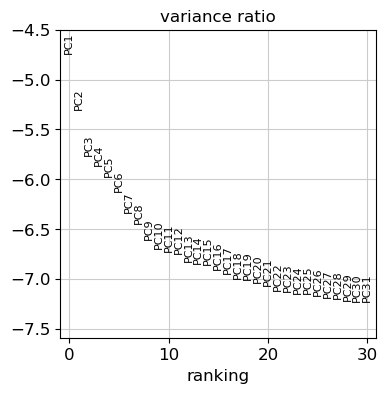

In [46]:
sc.pp.normalize_total(adata3)
sc.pp.log1p(adata3)
sc.pp.regress_out(adata3, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata3, max_value=10)
sc.tl.pca(adata3, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata3, log=True)

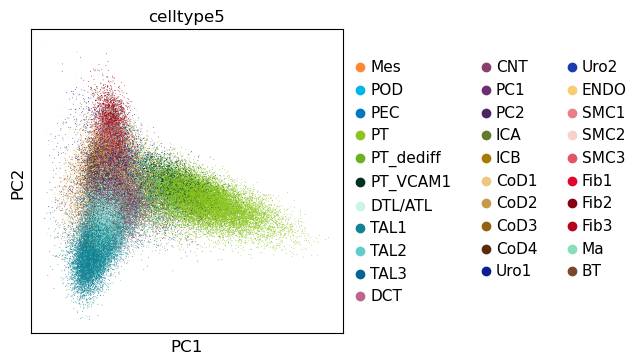

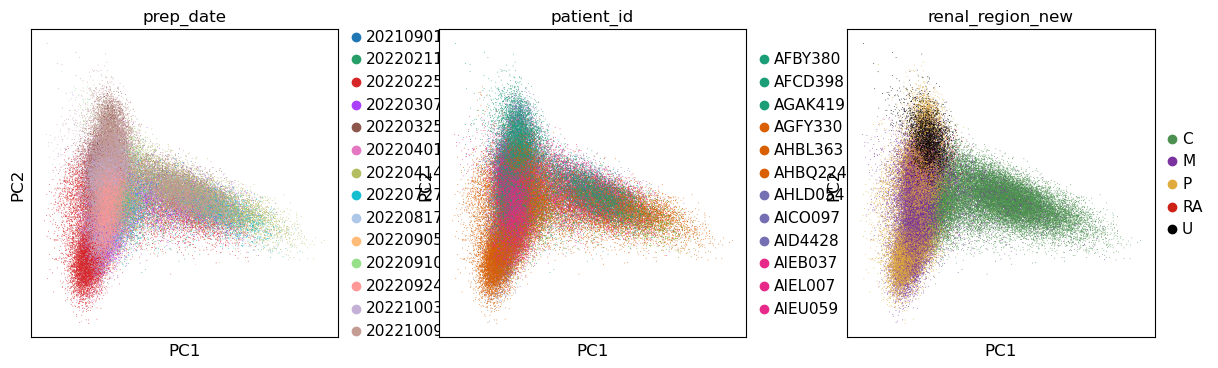

In [47]:
sc.pl.pca(adata3,color=['celltype5'])
sc.pl.pca(adata3,color=['prep_date','patient_id','renal_region_new'])

2023-06-29 18:23:23,988 - harmonypy - INFO - Iteration 1 of 10
2023-06-29 18:24:22,348 - harmonypy - INFO - Iteration 2 of 10
2023-06-29 18:25:21,573 - harmonypy - INFO - Converged after 2 iterations


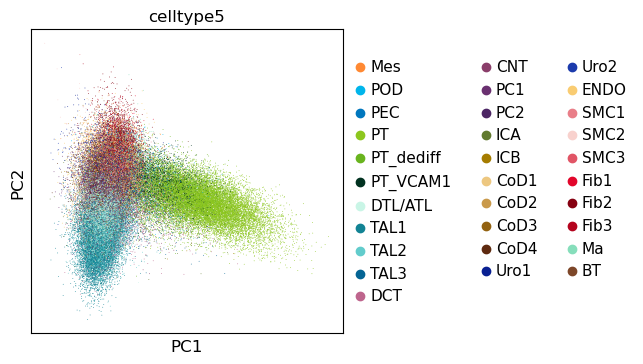

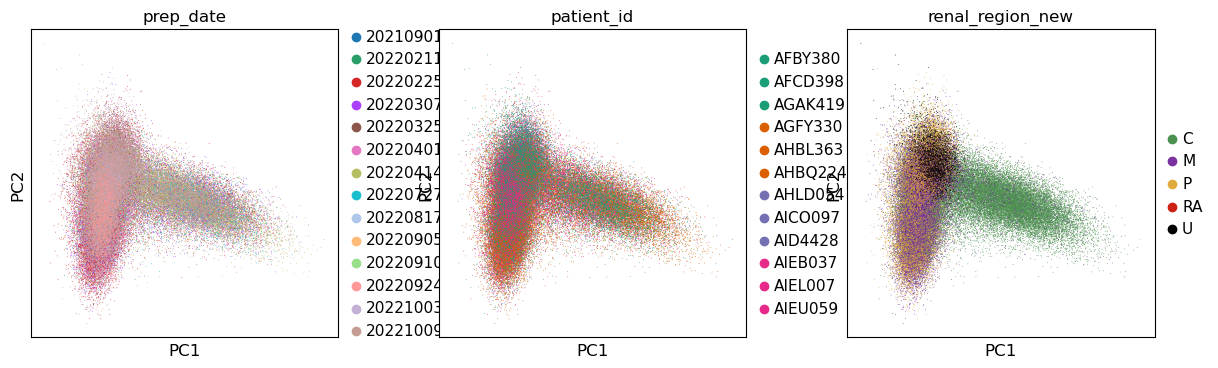

In [48]:
sc.external.pp.harmony_integrate(adata3, 'prep_date')
adata3.obsm['X_pca_first']=adata3.obsm['X_pca']
adata3.obsm['X_pca'] = adata3.obsm['X_pca_harmony']
sc.pl.pca(adata3,color=['celltype5'])
sc.pl.pca(adata3,color=['prep_date','patient_id','renal_region_new'])

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:22)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:50)


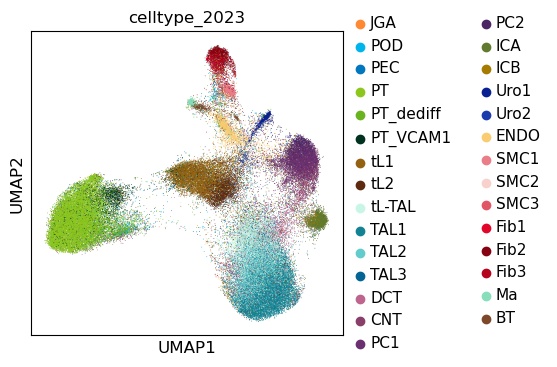

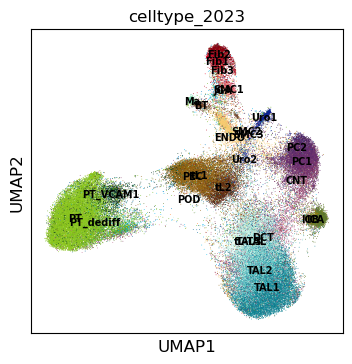

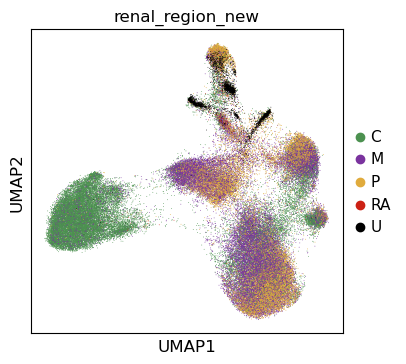

In [49]:
sc.pp.neighbors(adata3, n_neighbors=30,n_pcs=20,metric='cosine')
sc.tl.umap(adata3,min_dist=0.1)
sc.pl.umap(adata3, color=['celltype_2023'])
sc.pl.umap(adata3, color=['celltype_2023'],legend_loc='on data',legend_fontsize=7)
sc.pl.umap(adata3, color=['renal_region_new'])

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_celltype_2023']`


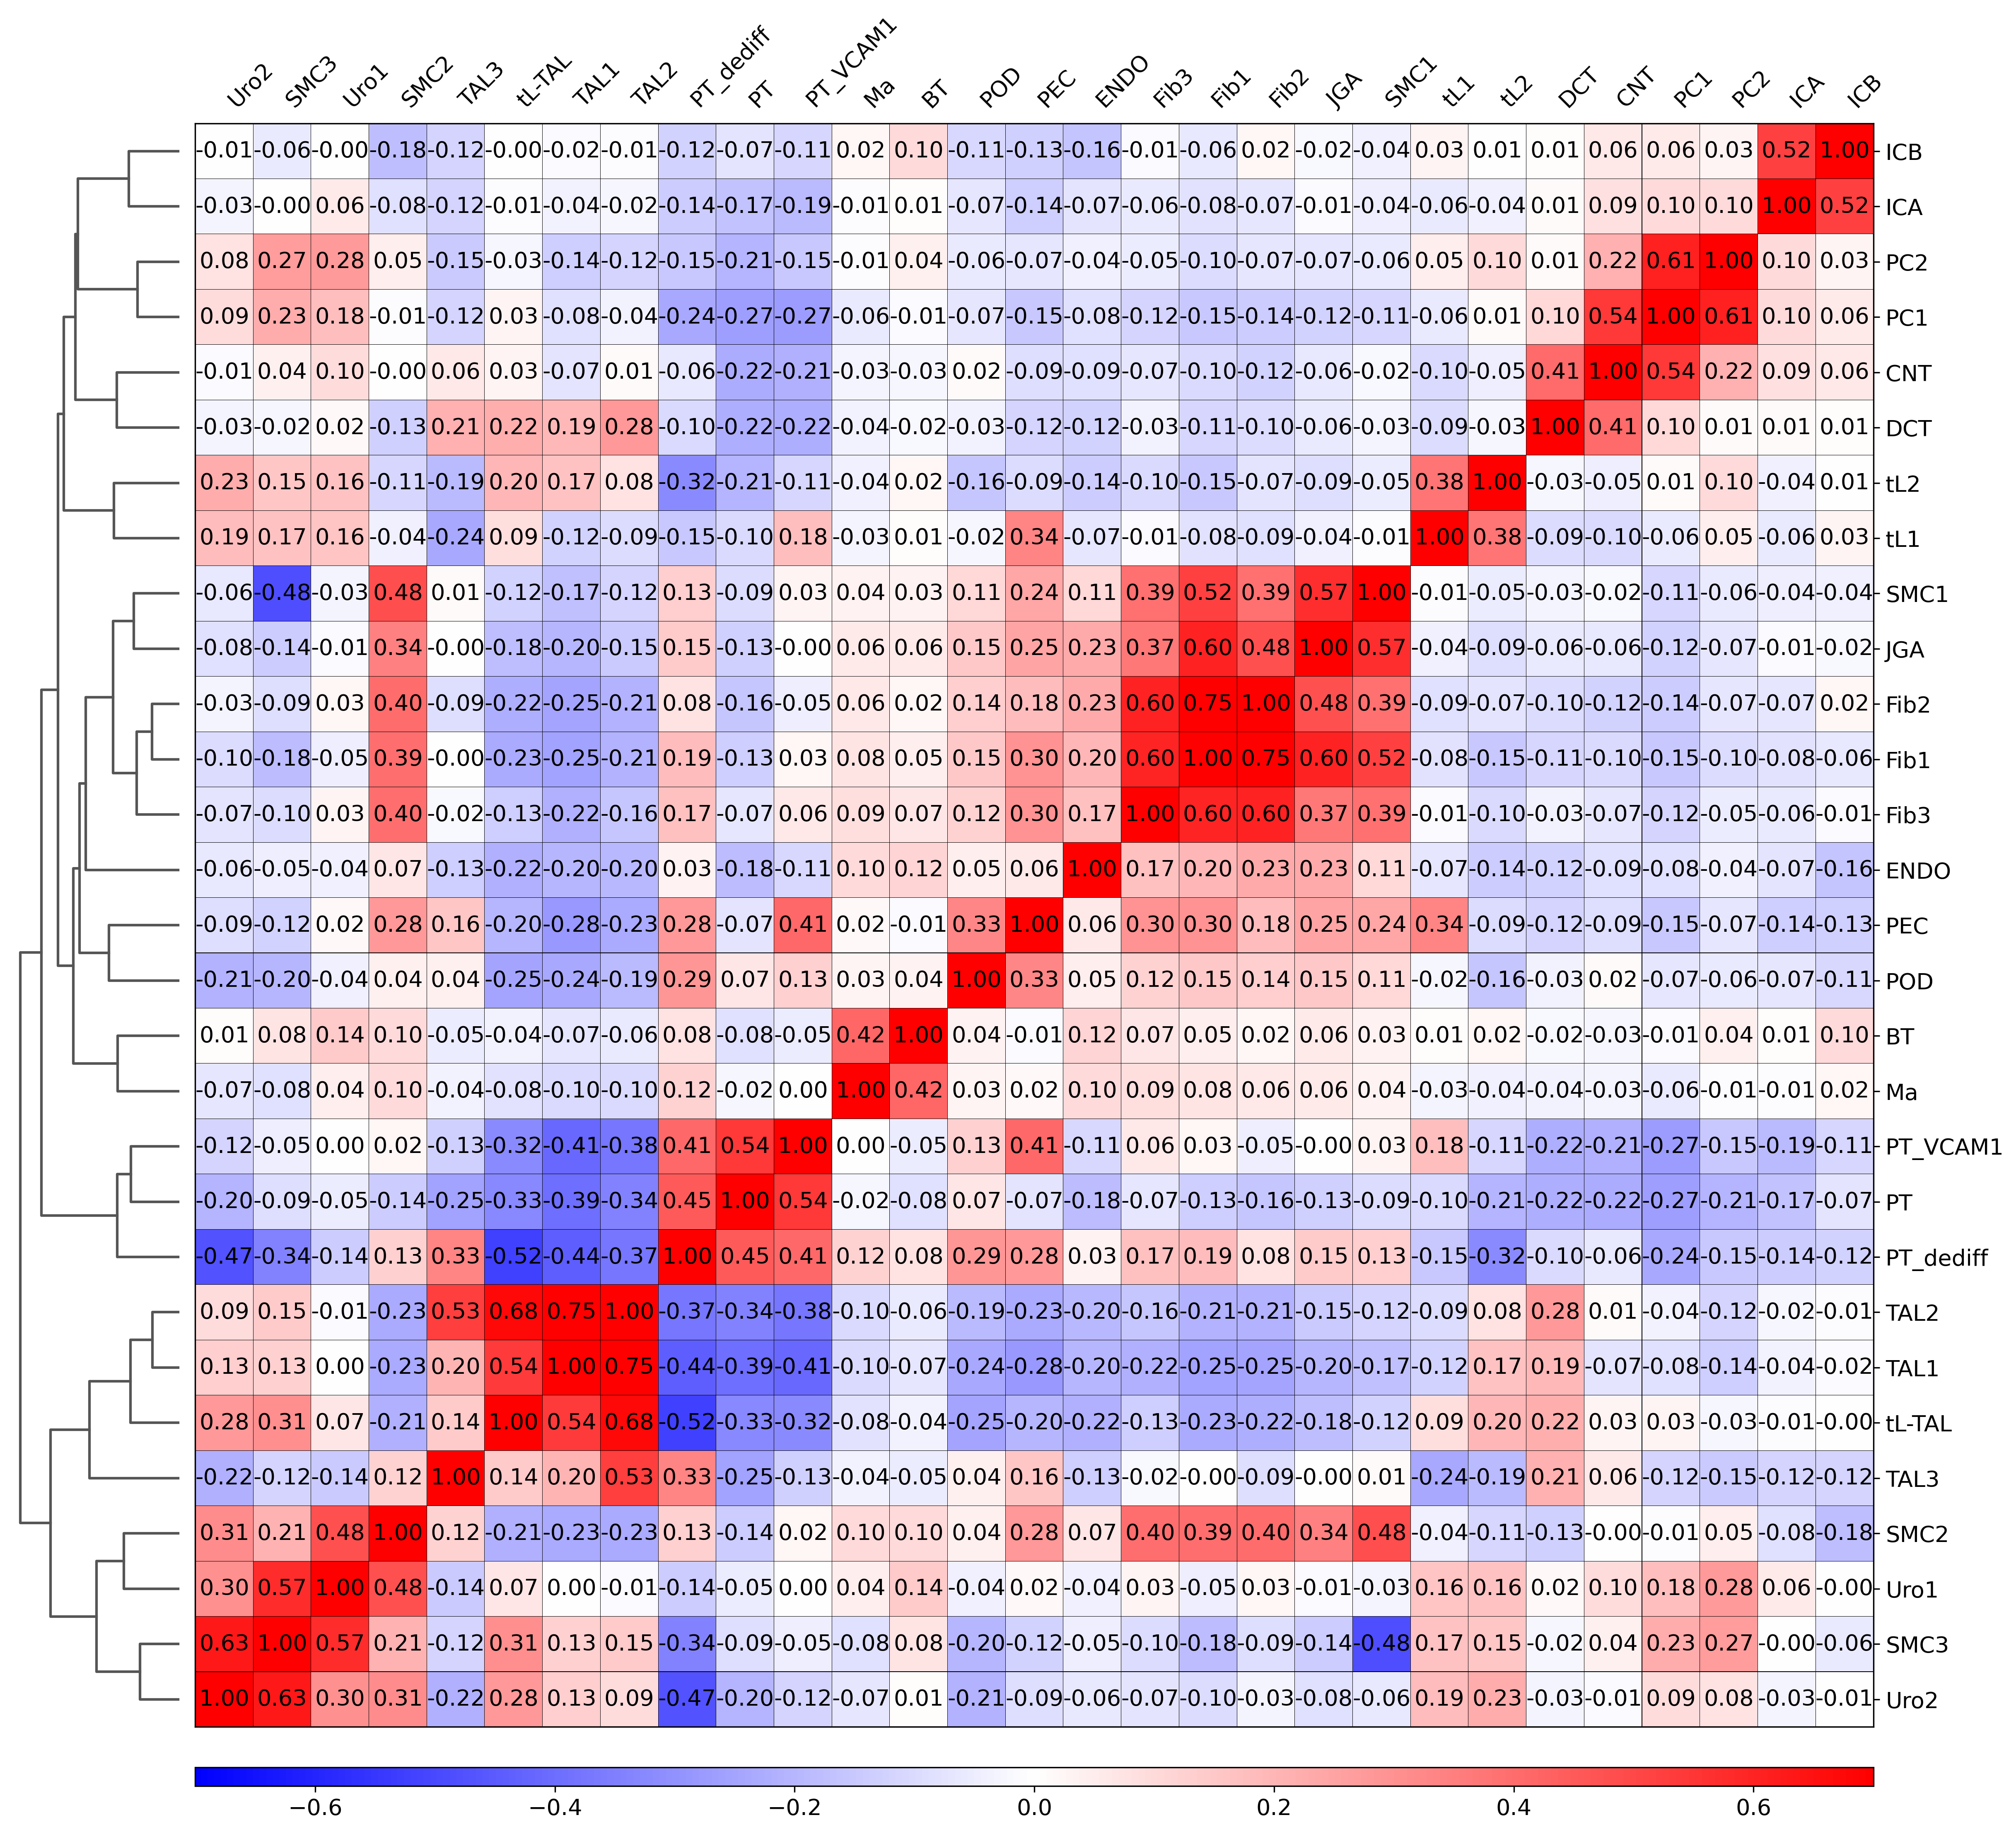

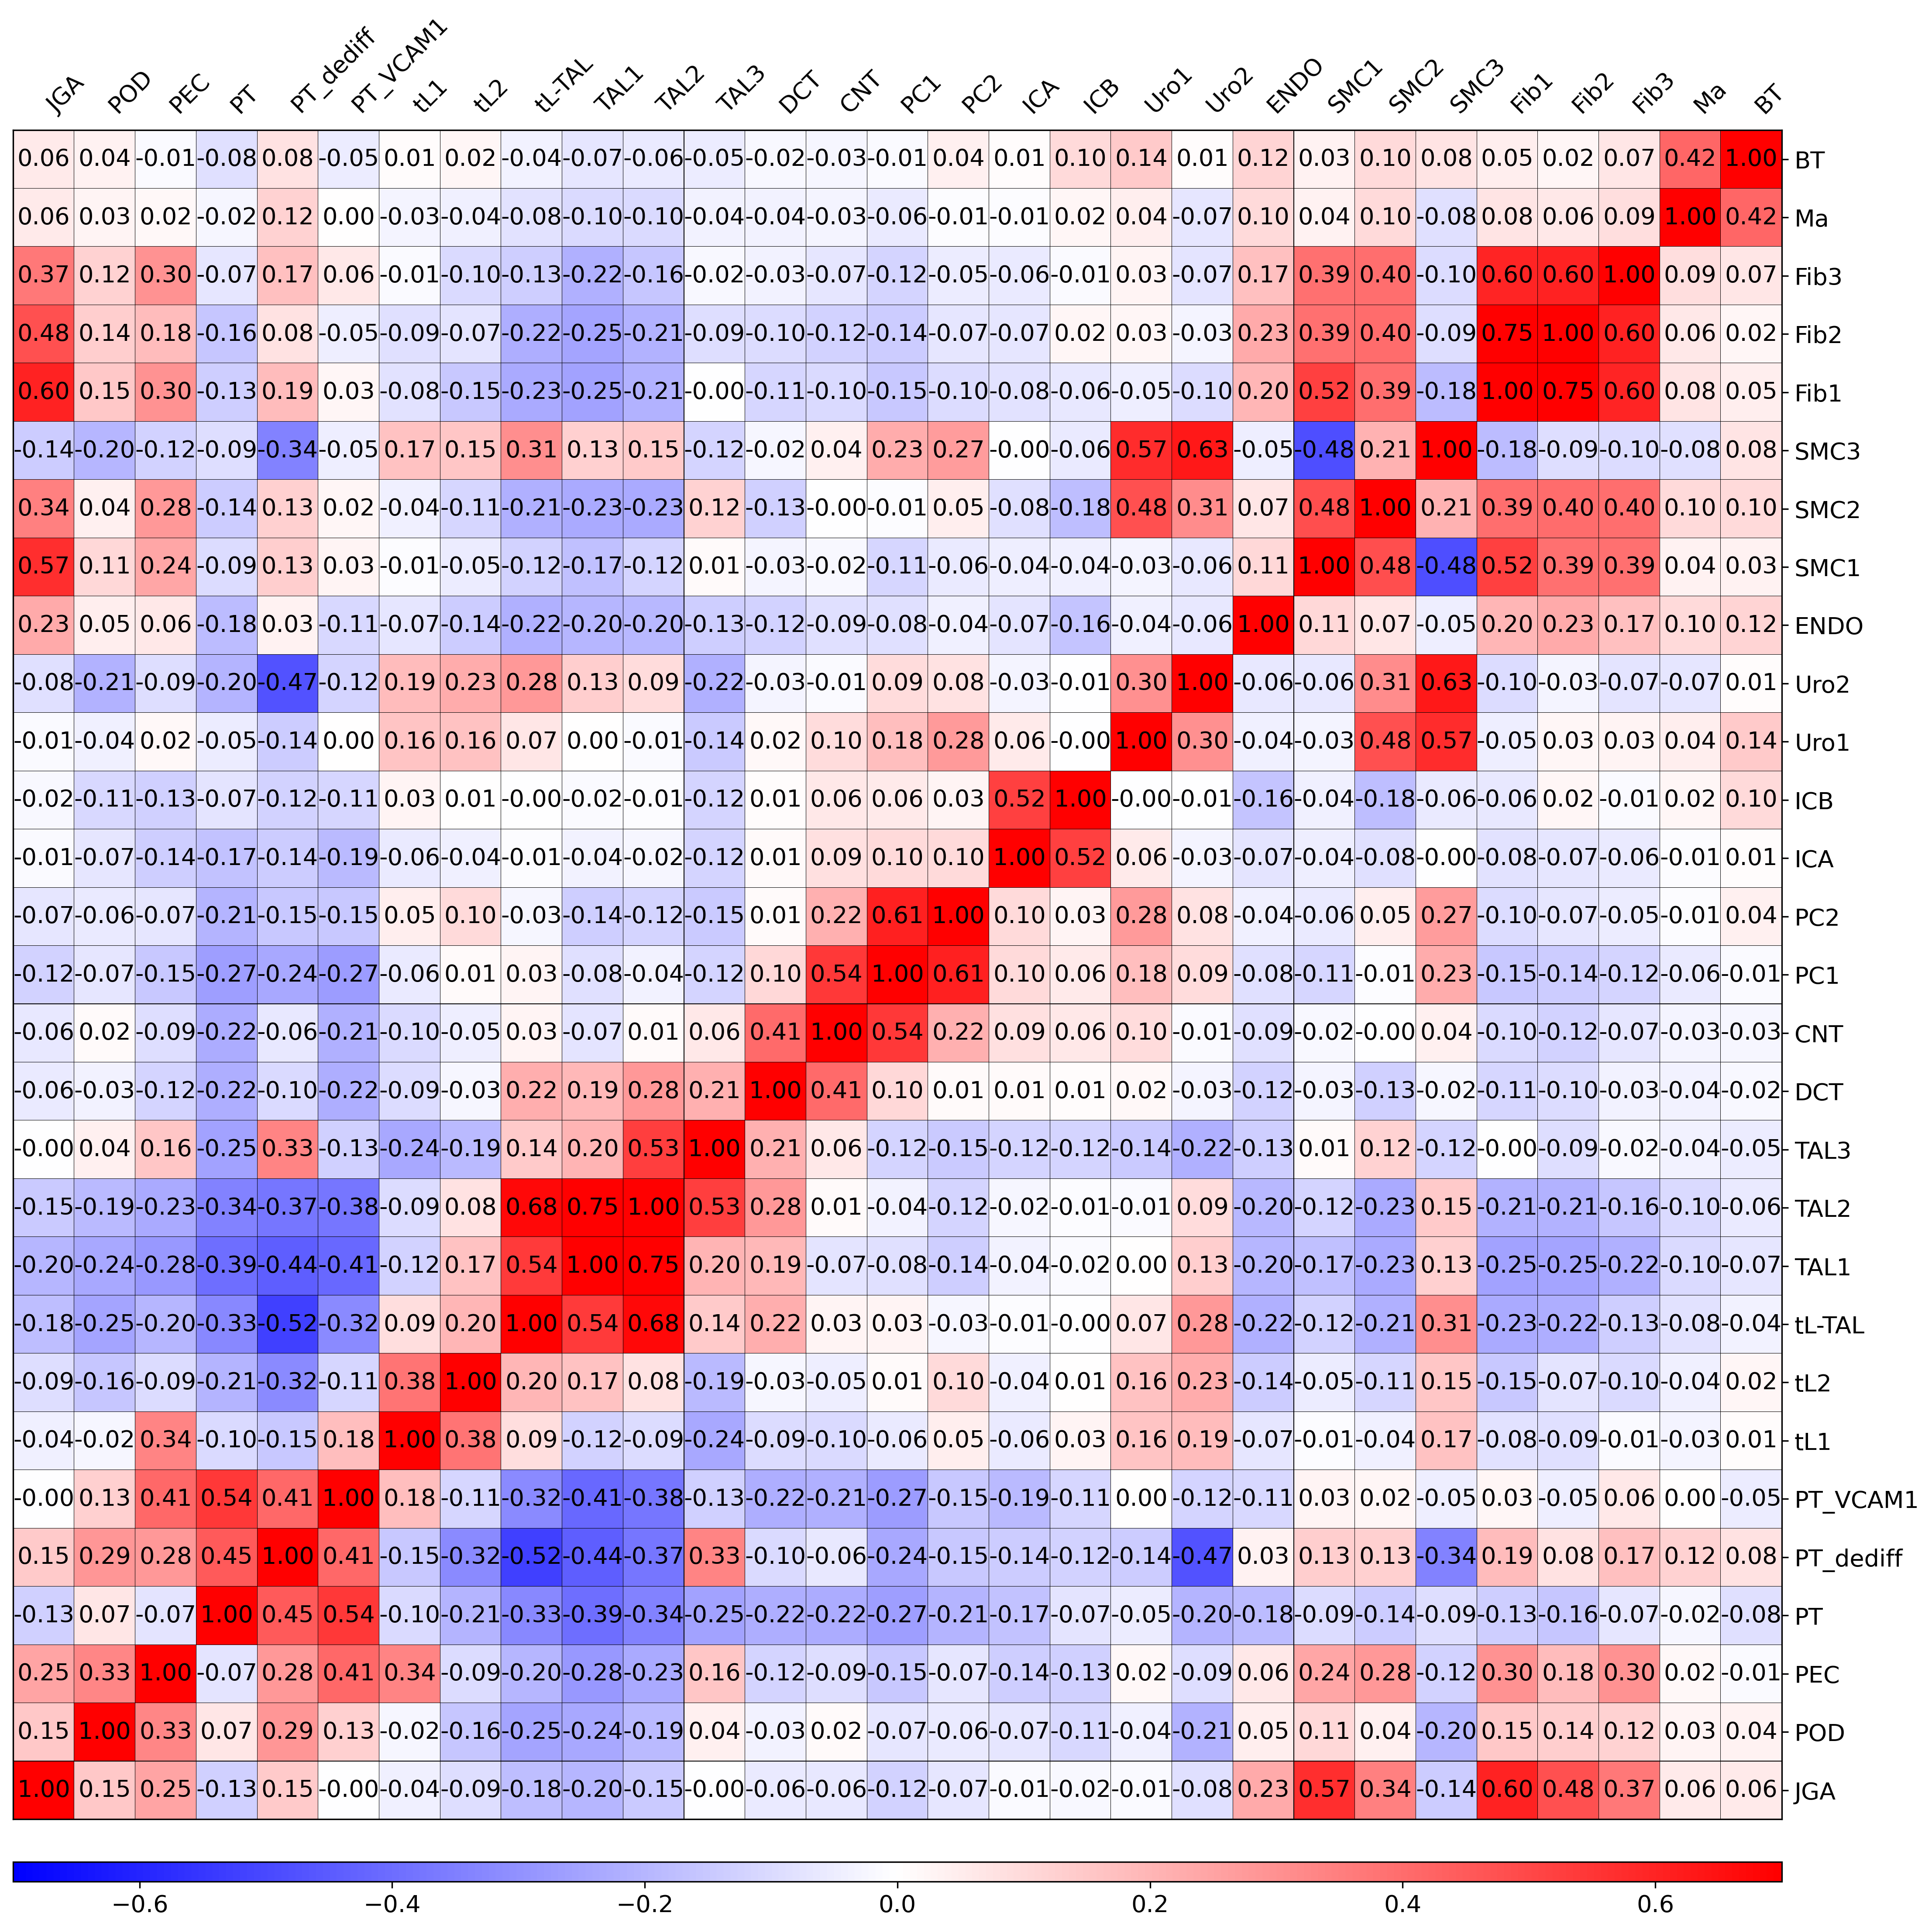

In [90]:
sc.settings.set_figure_params(dpi=300, facecolor='white',fontsize=13)
sc.pl.correlation_matrix(adata, groupby='celltype_2023',dendrogram=True,vmax=0.7,vmin=-0.7,show_correlation_numbers=True)
sc.pl.correlation_matrix(adata, groupby='celltype_2023',dendrogram=False,vmax=0.7,vmin=-0.7,show_correlation_numbers=True)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_renal_region_new']`


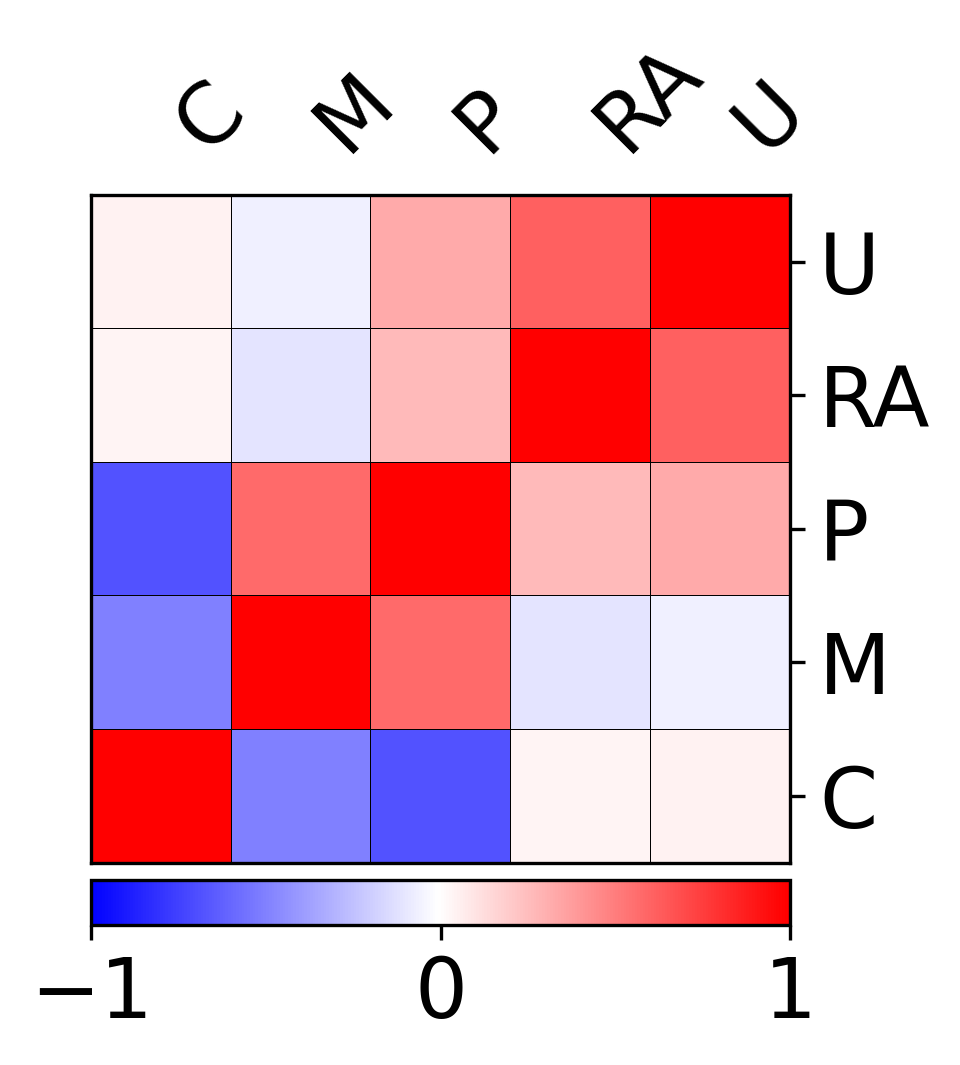

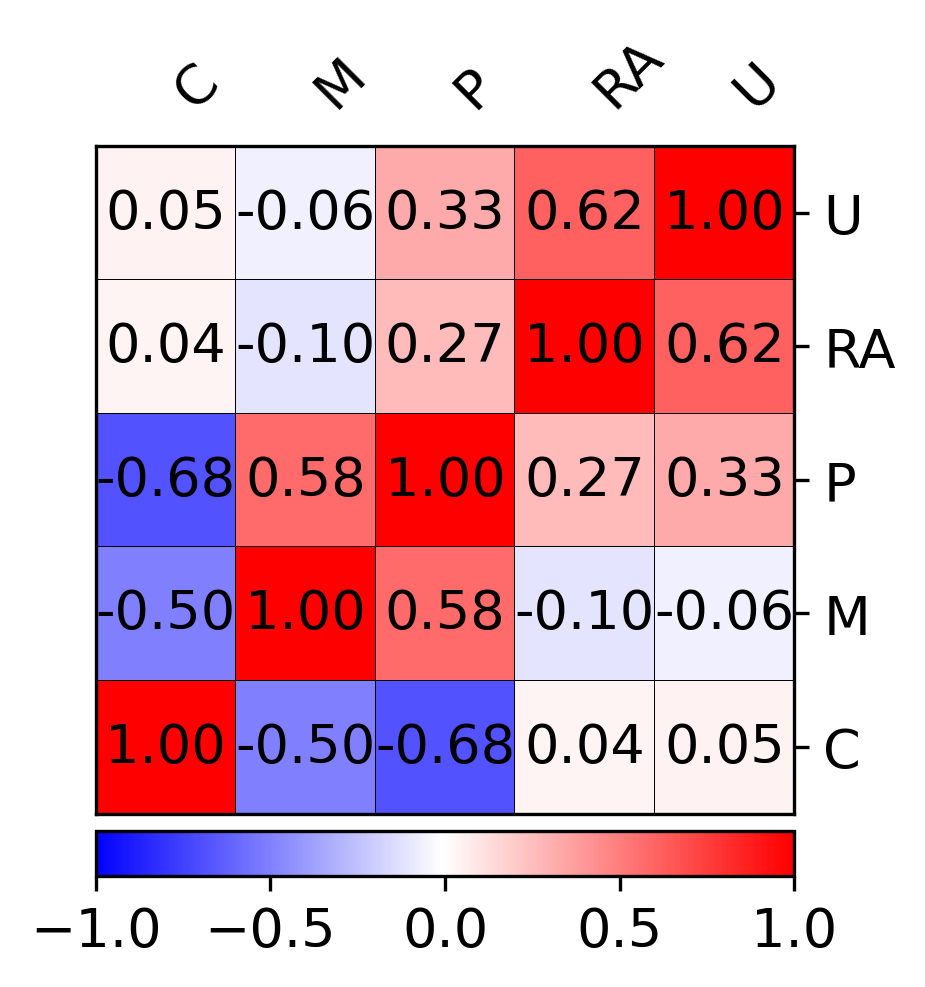

In [91]:
sc.settings.set_figure_params(dpi=300, facecolor='white',fontsize=20)
sc.pl.correlation_matrix(adata, groupby='renal_region_new',dendrogram=False)
sc.settings.set_figure_params(dpi=300, facecolor='white',fontsize=13)
sc.pl.correlation_matrix(adata, groupby='renal_region_new',dendrogram=False,show_correlation_numbers=True)

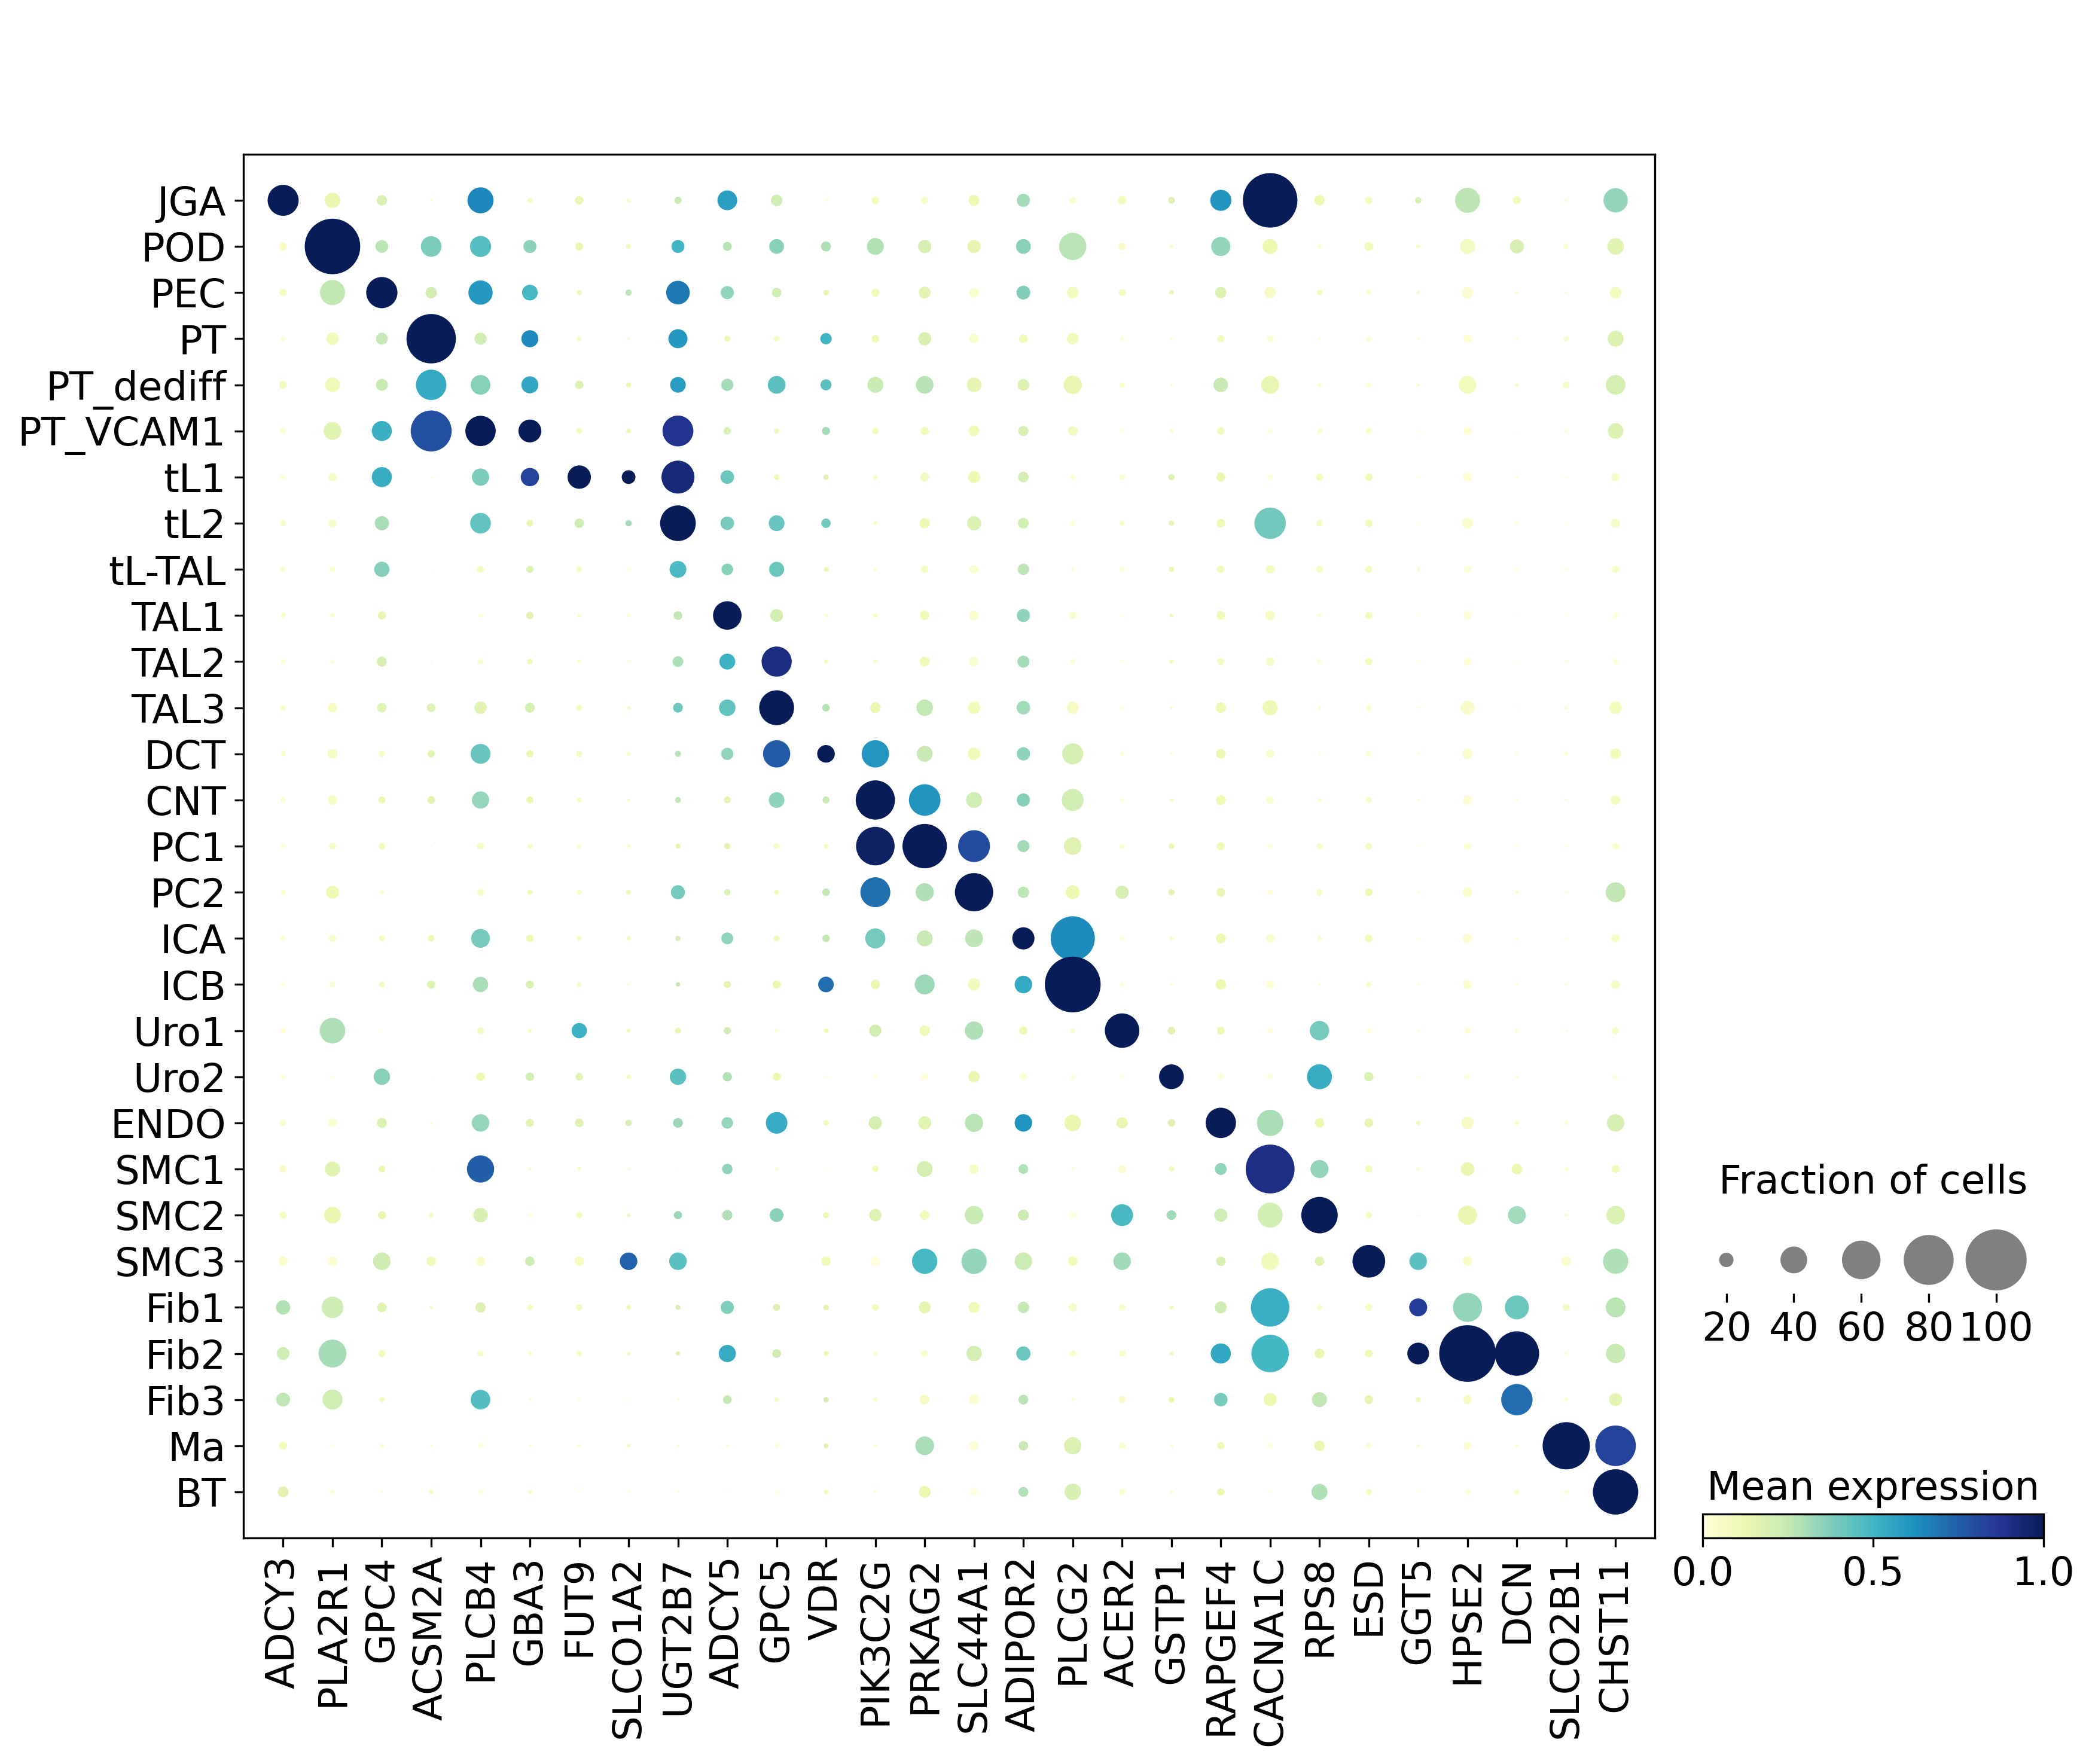

In [95]:
sc.settings.set_figure_params(dpi=300, facecolor='white',fontsize=19)
marker_genes=[ 'ADCY3','PLA2R1','GPC4',
              'ACSM2A','PLCB4',
              'GBA3','FUT9','SLCO1A2','UGT2B7',
              'ADCY5','GPC5',
              'VDR','PIK3C2G','PRKAG2','SLC44A1',
              'ADIPOR2','PLCG2',
              'ACER2','GSTP1',
              'RAPGEF4','CACNA1C','RPS8','ESD',
              'GGT5','HPSE2','DCN',
              'SLCO2B1','CHST11'
    ]
sc.pl.DotPlot(adata3, marker_genes, groupby='celltype_2023',
             standard_scale='var',expression_cutoff=0.8)\
.style(cmap="YlGnBu",largest_dot=600,dot_edge_lw=0,size_exponent=1.8)\
.legend(width=2.5,colorbar_title='Mean expression',size_title='Fraction of cells\n').show()